In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8727 entries, 0 to 8726
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         8727 non-null   object 
 1   County                                             8726 non-null   object 
 2   City                                               8726 non-null   object 
 3   State                                              8726 non-null   object 
 4   Postal Code                                        8726 non-null   float64
 5   Model Year                                         8726 non-null   float64
 6   Make                                               8726 non-null   object 
 7   Model                                              8726 non-null   object 
 8   Electric Vehicle Type                              8726 non-null   object 
 9   Clean Al

In [5]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               1
City                                                 1
State                                                1
Postal Code                                          1
Model Year                                           1
Make                                                 1
Model                                                1
Electric Vehicle Type                                1
Clean Alternative Fuel Vehicle (CAFV) Eligibility    1
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 1
DOL Vehicle ID                                       1
Vehicle Location                                     1
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64

In [6]:
df = df.dropna()

For the task of market size of electric vehicles analysis, we can explore the following areas:

EV Adoption Over Time: Analyze the growth of the EV population by model year.


Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).


EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).


Make and Model Popularity: Identify the most popular makes and models among the registered EVs.


Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.


Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

<ipython-input-9-71931e2e41ac>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index , y=ev_adoption_by_year.values , palette="viridis")


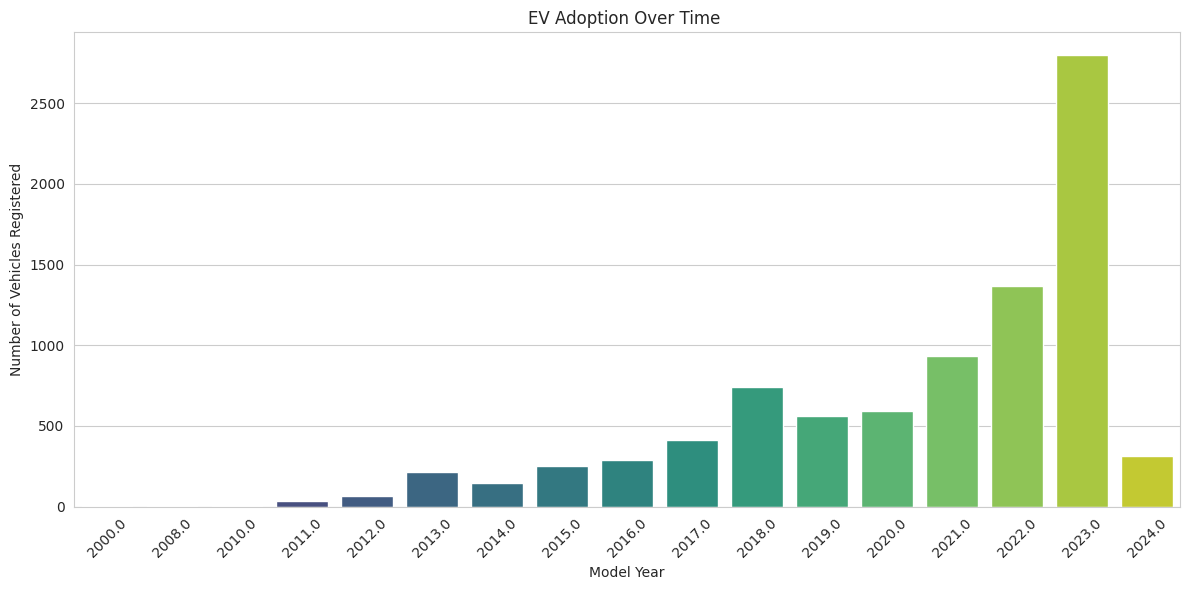

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# EV Adoption over time
plt.figure(figsize=(12,6))
ev_adoption_by_year = df['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index , y=ev_adoption_by_year.values , palette="viridis")
plt.title("EV Adoption Over Time ")
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

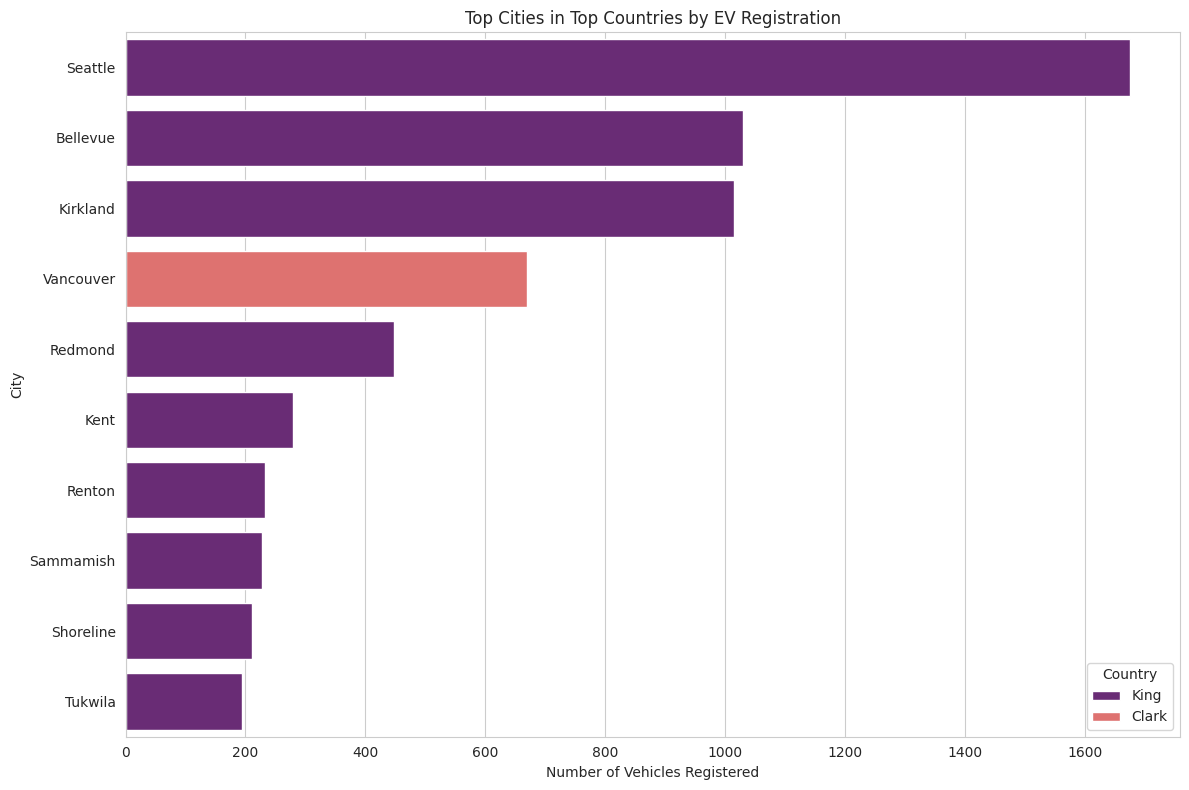

In [14]:
# geograpical distribution at country level
ev_country_distribution = df['County'].value_counts()
top_countries = ev_country_distribution.head(3).index

# filtering the dataset for these top countries
top_countries_data = df[df['County'].isin(top_countries)]

# analyzing the distribution of EV's within the cities of these top countries
ev_city_distribution_top_countries = top_countries_data.groupby(['County' , 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these countries
top_cities = ev_city_distribution_top_countries.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x= 'Number of Vehicles' , y='City' , hue='County' , data=top_cities, palette='magma')
plt.title('Top Cities in Top Countries by EV Registration')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


<ipython-input-16-bfc76be59a19>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= ev_type_distribution.values , y= ev_type_distribution.index , palette="rocket")


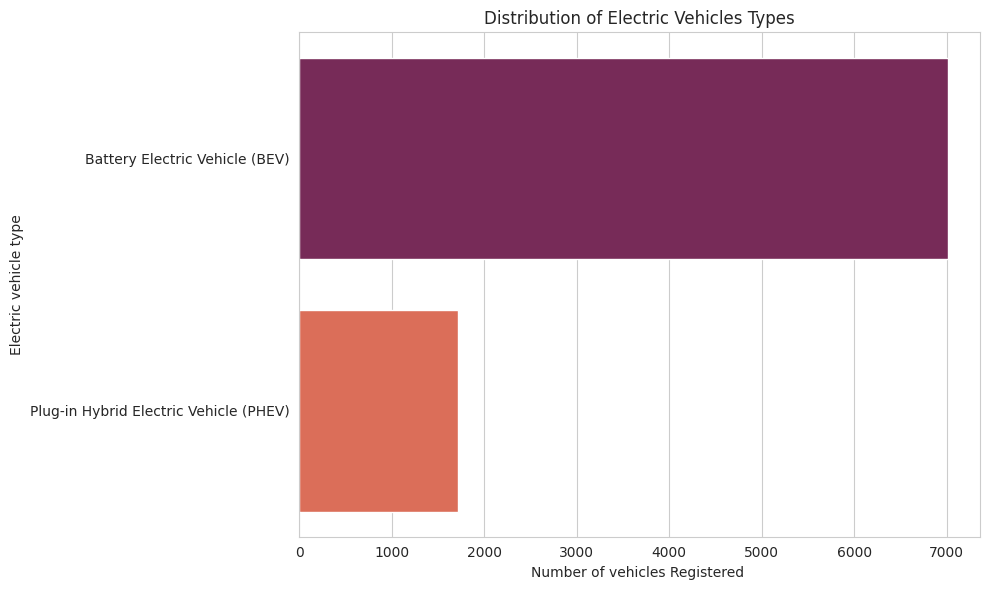

In [16]:
# analyzing the distribution od electric vehicle types
ev_type_distribution  = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x= ev_type_distribution.values , y= ev_type_distribution.index , palette="rocket")
plt.title('Distribution of Electric Vehicles Types')
plt.xlabel('Number of vehicles Registered ')
plt.ylabel('Electric vehicle type')
plt.tight_layout()
plt.show()

<ipython-input-17-7d93f8c54ed0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_make_distribution.values , y= ev_make_distribution.index , palette='cubehelix')


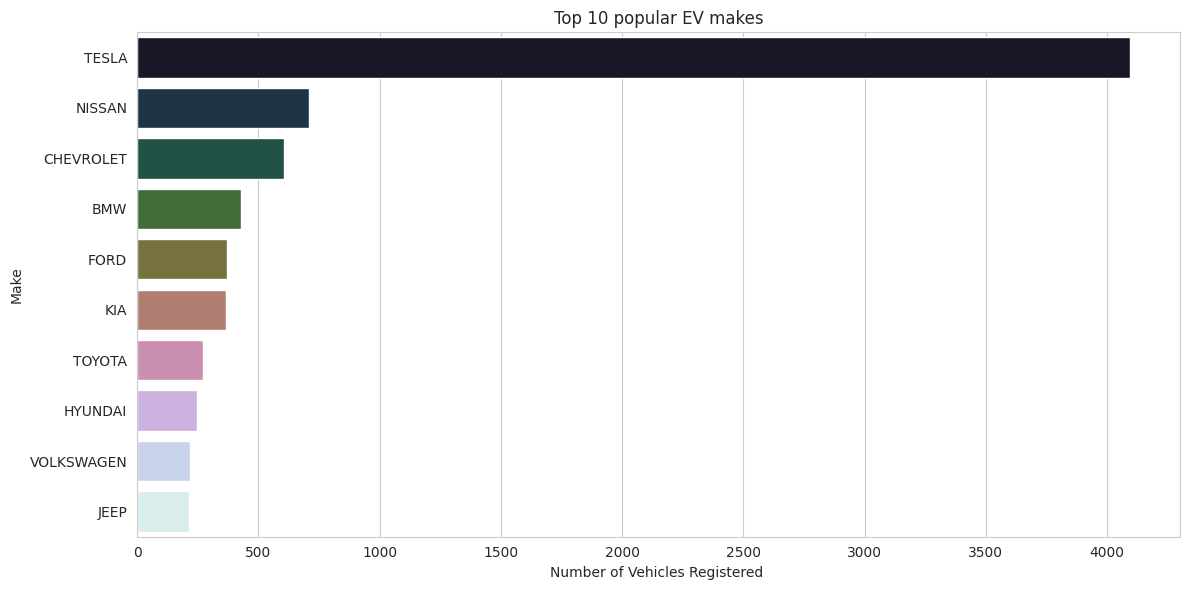

In [17]:
# Analyzing the popularity of EV manufaturers
ev_make_distribution = df['Make'].value_counts().head(10)   # Limiting to top 10 for clarity

plt.figure(figsize=(12,6))
sns.barplot(x = ev_make_distribution.values , y= ev_make_distribution.index , palette='cubehelix')
plt.title('Top 10 popular EV makes')
plt.xlabel('Number of Vehicles Registered ')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

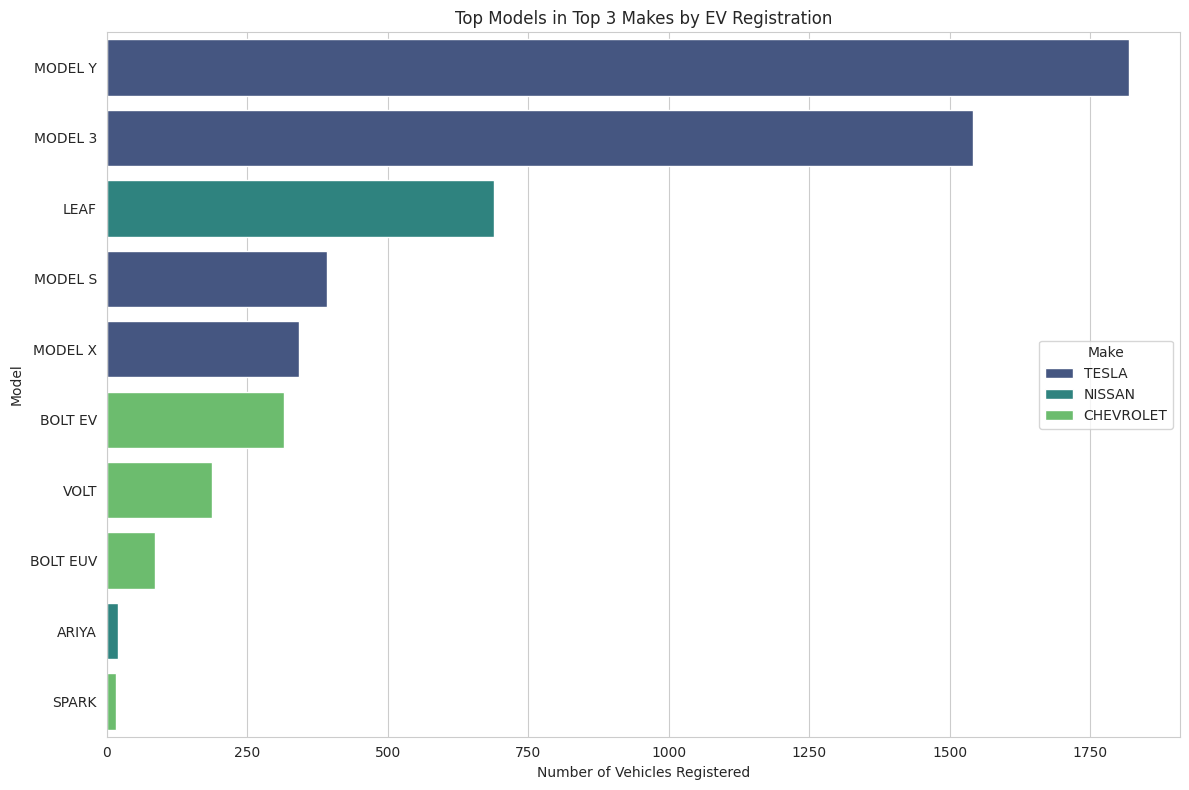

In [20]:
# selecting the top 3 manufacturing based on the numbers of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufaturers
top_makes_data = df[df['Make'].isin(top_3_makes)]

#the popularity of EV models within these top manufacturesre
ev_model_distribution_top_makes = top_makes_data.groupby(['Make' , 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visulizing the top 10 models across these manufactures for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x ='Number of Vehicles' , y = 'Model' , hue='Make' , data=top_models , palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registration')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make' , loc='center right')
plt.tight_layout()
plt.show()


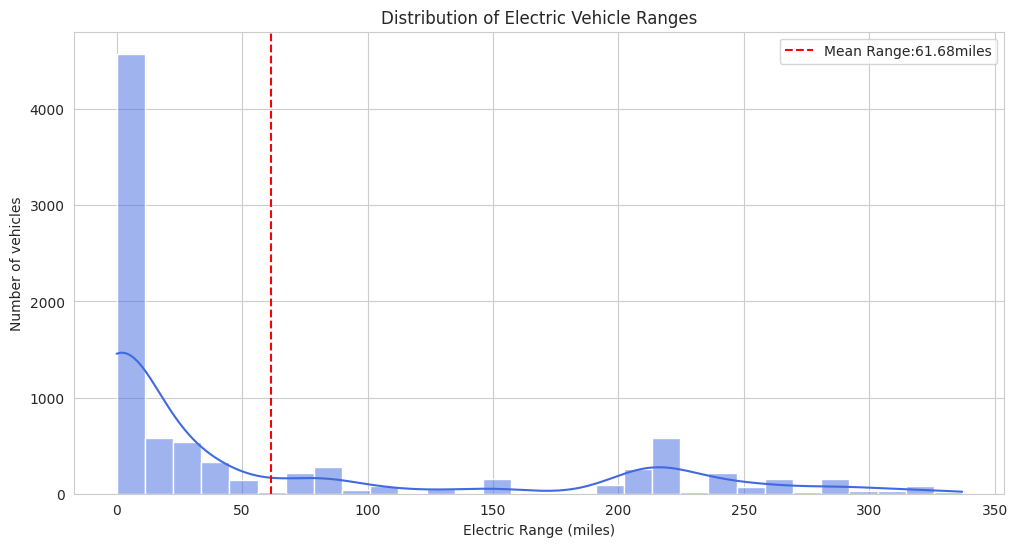

In [22]:
# analyzoing the distribution of electric range
plt.figure(figsize=(12,6))
sns.histplot(df['Electric Range'] , bins=30 , kde=True , color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of vehicles')
plt.axvline(df['Electric Range'].mean() , color='red' , linestyle='--' , label=f'Mean Range:{df["Electric Range"].mean():.2f}miles')
plt.legend()
plt.show()

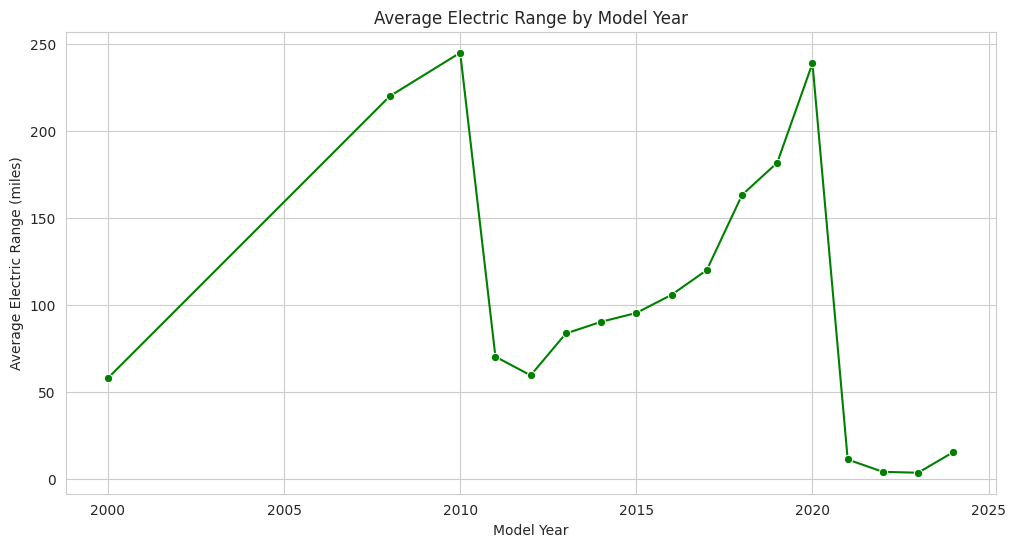

In [25]:
# Calculating the average electric ranmge be model year
average_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12 ,6))
sns.lineplot(x='Model Year' , y='Electric Range' , data=average_range_by_year, marker='o',color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

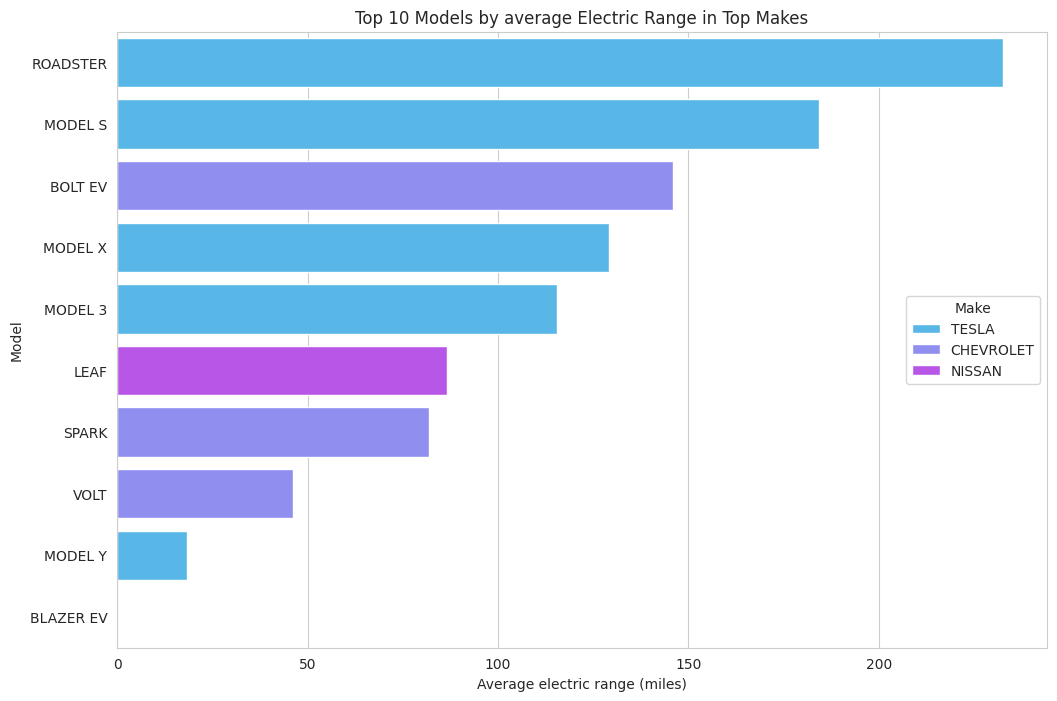

In [28]:
average_range_by_model = top_makes_data.groupby(['Make' , 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12 ,8))
barplot = sns.barplot(x ='Electric Range' , y ='Model' , hue='Make' , data=top_range_models , palette="cool")
plt.title('Top 10 Models by average Electric Range in Top Makes' )
plt.xlabel('Average electric range (miles)')
plt.ylabel('Model')
plt.legend(title='Make' , loc='center right')
plt.show()

In [29]:
# calculating the number of EV's registered each year
ev_registration_counts = df['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
2000.0       1
2008.0       1
2010.0       1
2011.0      32
2012.0      63
2013.0     216
2014.0     144
2015.0     250
2016.0     292
2017.0     415
2018.0     742
2019.0     564
2020.0     592
2021.0     933
2022.0    1365
2023.0    2800
2024.0     315
Name: count, dtype: int64

In [33]:
from scipy.optimize import curve_fit
import numpy as np

#filter the dataset to include years with complete data , assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <=2023]

# define a function for exponential growth to fit the data
def exp_growth(x ,a,b):
    return a * np.exp(b*x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to exponential growth function
params , covariance = curve_fit(exp_growth , x_data , y_data )

# use the fitted function to forecast the number of EV for 2024 and the next five years
forecast_years = np.arange(2024 , 2024+6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years , *params)

# creates a dictionary to display th forecastied values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min() , forecasted_values))

print(forecasted_evs)

{2024.0: 3764.0403726779045, 2025.0: 5602.188410401615, 2026.0: 8337.985748890851, 2027.0: 12409.794397422445, 2028.0: 18470.04799771738, 2029.0: 27489.7925068638}


let's plot these values in the graph

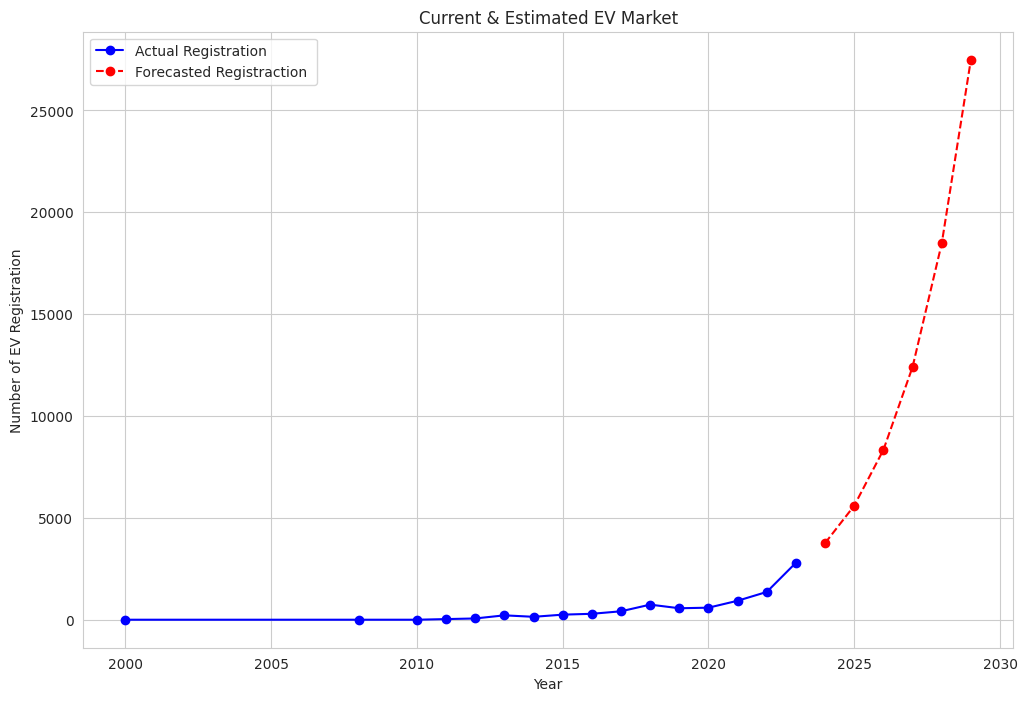

In [34]:
# prepare data for plotting
years = np.arange(filtered_years.index.min() , 2029+1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024 , 2029 +1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12,8))
plt.plot(actual_years , actual_values , 'bo-' , label='Actual Registration')
plt.plot(forecast_years_full , forecasted_values_full , 'ro--' , label ='Forecasted Registraction ')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registration' )
plt.legend()
plt.grid(True)

plt.show()

The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.